In [1]:
import numpy as np
import pickle
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipdb
import copy
from scipy import sparse
import time
from sklearn.preprocessing import normalize
import memory_profiler as mprof



In [4]:
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [6]:
Data_discretized=load_obj('partial_SK_Data_discretized_with_some_distributions')

In [7]:
analyzed_pairs=[]
levels=[]
j=-1
for d in Data_discretized:
    j+=1
    if 'CI' in d['Trials'][0].keys():
        analyzed_pairs.append(j)
        levels.append(d['Level'])
#for d in Data_discretized:
#    d['Trials'][0]

In [8]:
levels

[6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4]

In [48]:
ci_6_flat=[]
for sublist in ci_6:
    for item in sublist:
        ci_6_flat.append(item)
        
ci_4_flat=[]
for sublist in ci_4:
    for item in sublist:
        ci_4_flat.append(item)
        
ci_2_flat=[]
for sublist in ci_2:
    for item in sublist:
        ci_2_flat.append(item)        

        
        
        
        
plt.clf()        
plt.hist(ci_6_flat,bins=30)
plt.show()

plt.clf()        
plt.hist(ci_4_flat,bins=30)
plt.show()


plt.clf()        
plt.hist(ci_2_flat,bins=30)
plt.show()


NameError: name 'ci_6' is not defined

In [9]:

tos_6=[]
tos_4=[]
tos_2=[]

sample_info_6=[]
teachers_entropy_6=[]

sample_info_4=[]
teachers_entropy_4=[]

sample_info_2=[]
teachers_entropy_2=[]

for i in analyzed_pairs:
    d=Data_discretized[i]
    #print('#### NEW PAIR ######')
    #print('#### Level:'+str(d['Level'])+' ######')
    plt.clf()
    plt.figure()
    trial_number=-1
    
    for t in d['Trials']:
       # print('----- NEW TRIAL ------')
        trial_number+=1
        if 'CI' in t.keys():            
            '''
            plt.plot(t['CI'],'-o')
            plt.ylabel('CI')
            plt.xlabel('move')
            plt.title(['Level:',d['Level'],'Trial:',trial_number,'pair:',d['Teachers_Id'],'Last move Id:',t['Examples'][-1]['move_Id']])
            plt.show()
            '''
            
            
            typicalllity_of_sample=np.array(t['Sample_information'])/np.array(t['Teachers_entropy'])
                
            
            if d['Level']==6:                
                tos_6.append(typicalllity_of_sample)
                sample_info_6.append(t['Sample_information'])
                teachers_entropy_6.append(t['Teachers_entropy'])
                #ci_6.append(t['CI'])
            elif d['Level']==4:
                tos_4.append(typicalllity_of_sample)
                sample_info_4.append(t['Sample_information'])
                teachers_entropy_4.append(t['Teachers_entropy'])
                #ci_4.append(t['CI'])
            elif d['Level']==2:
                sample_info_2.append(t['Sample_information'])
                teachers_entropy_2.append(t['Teachers_entropy'])
                tos_2.append(typicalllity_of_sample)
                #ci_2.append(t['CI'])
                
            
            
            
            
            

/home/ahaimovici/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


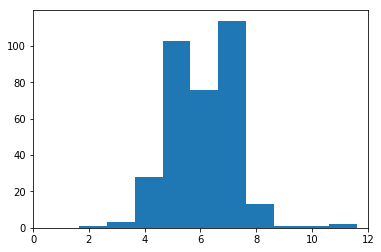

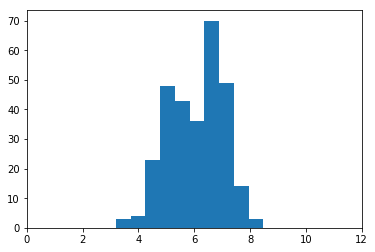

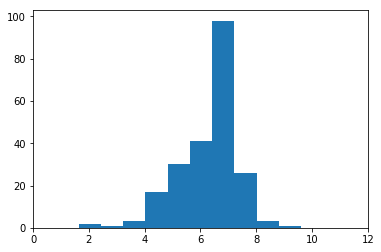

In [13]:
sample_info_6_flat=[]
for sublist in sample_info_6:
    for item in sublist:
        sample_info_6_flat.append(item)
        
sample_info_4_flat=[]
for sublist in sample_info_4:
    for item in sublist:
        sample_info_4_flat.append(item)

sample_info_2_flat=[]
for sublist in sample_info_2:
    for item in sublist:
        sample_info_2_flat.append(item)
        
sample_info_6_flat=list(filter(lambda a: a != -np.Inf, sample_info_6_flat))
sample_info_6_flat=list(filter(lambda a: a != np.Inf, sample_info_6_flat))

sample_info_4_flat=list(filter(lambda a: a != -np.Inf, sample_info_4_flat))
sample_info_4_flat=list(filter(lambda a: a != np.Inf, sample_info_4_flat))

sample_info_2_flat=list(filter(lambda a: a != -np.Inf, sample_info_2_flat))
sample_info_2_flat=list(filter(lambda a: a != np.Inf, sample_info_2_flat))


plt.clf()        
plt.hist(sample_info_6_flat)
plt.xlim([0,12])
plt.show()

plt.clf()        
plt.hist(sample_info_4_flat)
plt.xlim([0,12])
plt.show()

plt.clf()        
plt.hist(sample_info_2_flat)
plt.xlim([0,12])
plt.show()        
        
        

In [7]:
tos_6_flat=[]
for sublist in tos_6:
    for item in sublist:
        tos_6_flat.append(item)
        
tos_4_flat=[]
for sublist in tos_4:
    for item in sublist:
        tos_4_flat.append(item)
        
tos_2_flat=[]
for sublist in tos_2:
    for item in sublist:
        tos_2_flat.append(item)        

        
      

'\nplt.clf()        \nplt.hist(tos_6_flat)\nplt.show()\n\nplt.clf()        \nplt.hist(tos_4_flat)\nplt.show()\n\nplt.clf()        \nplt.hist(tos_2_flat)\nplt.show()\n'

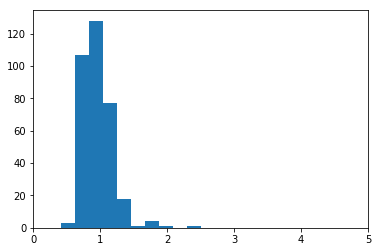

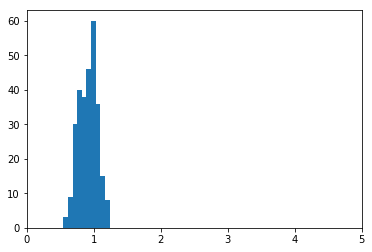

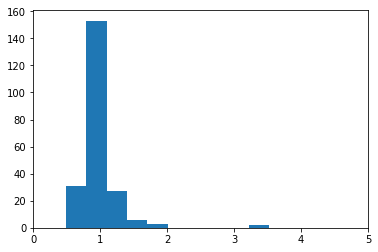

In [47]:
tos_6_flat=np.array(tos_6_flat)
plt.clf()        
plt.hist(tos_6_flat[tos_6_flat<10])
plt.xlim([0,5])
plt.show()

plt.clf()        
plt.hist(tos_4_flat)
plt.xlim([0,5])
plt.show()

plt.clf()        
plt.hist(tos_2_flat)
plt.xlim([0,5])
plt.show()
  

In [44]:
max(tos_6_flat)

73.859907172785114

In [28]:
-np.Inf in tos_6_flat

True

In [41]:
tos_6_flat=list(filter(lambda a: a != -np.Inf, tos_6_flat))
tos_6_flat=list(filter(lambda a: a != np.Inf, tos_6_flat))

tos_4_flat=list(filter(lambda a: a != -np.Inf, tos_4_flat))
tos_4_flat=list(filter(lambda a: a != np.Inf, tos_4_flat))

tos_2_flat=list(filter(lambda a: a != -np.Inf, tos_2_flat))
tos_2_flat=list(filter(lambda a: a != np.Inf, tos_2_flat))

In [40]:
len(tos_6_flat)

342

In [ ]:
np.array(Data_discretized[0]['Trials'][0]['Sample_information'])/np.array(Data_discretized[0]['Trials'][0]['Teachers_entropy'])

In [ ]:
print(Data_discretized[0]['Trials'][0]['Sample_information'])
print(Data_discretized[0]['Trials'][0]['Teachers_entropy'])

In [ ]:
5.9627075258301039/6.6938858291807657